# All about Titanic

### **Libraries**

In [ ]:
# Numerical & Data Handling
import numpy as np
import pandas as pd
import scipy as sp
import math

# Visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
from sklearn.tree import plot_tree
from scipy.optimize import curve_fit

# Machine Learning Libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor, 
							  ExtraTreesClassifier, ExtraTreesRegressor, 
							  BaggingClassifier, BaggingRegressor, 
							  GradientBoostingClassifier, GradientBoostingRegressor, 
							  AdaBoostClassifier, AdaBoostRegressor, 
							  VotingClassifier, VotingRegressor,
							  StackingClassifier, StackingRegressor)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from mlxtend.frequent_patterns import apriori, association_rules
import xgboost as xgb

# Neural Network Libraries
import torch
from torch import nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor
import huggingface
import keras
import tensorflow
from transformers import pipeline

# Feature Engineering
from sklearn.preprocessing import (StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler, Normalizer, 
								   LabelEncoder, OneHotEncoder, OrdinalEncoder, LabelBinarizer)
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE, SequentialFeatureSelector, VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from mlxtend.preprocessing import TransactionEncoder

# Dimensionality Reduction
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

# Hyperparameter Tuning with Bayesian Optimization
from hyperopt import hp, tpe, fmin, Trials

# Evaluation
from sklearn.metrics import (classification_report, pairwise_distances, silhouette_score, 
							 roc_curve, auc, roc_auc_score, RocCurveDisplay, 
							 confusion_matrix, ConfusionMatrixDisplay, 
							 accuracy_score, recall_score, precision_score, f1_score,
							 log_loss, hinge_loss)
from torchmetrics import Accuracy
import statsmodels.api as sm
from skimpy import skim

### **Data Preparation**
| Variable  | Definition                               | Key                                                |
|---------- |------------------------------------------|----------------------------------------------------|
| survival  | Survival                                 | 0 = No, 1 = Yes                                    |
| pclass    | Passenger class                          | 1 = 1st, 2 = 2nd, 3 = 3rd                          |
| sex       | Sex                                      | male, female                                       |
| age       | Age in years                             | Numeric                                            |
| sibsp     | # of siblings / spouses aboard the Titanic | Numeric                                           |
| parch     | # of parents / children aboard the Titanic | Numeric                                           |
| fare      | Passenger fare                           | Numeric                                            |
| embarked  | Port of Embarkation                      | C = Cherbourg, Q = Queenstown, S = Southampton     |
| class     | Passenger class (string)                 | First, Second, Third                               |
| who       | Person type                              | man, woman, child                                  |
| adult_male| Is adult male                            | True, False                                        |
| deck      | Deck level                               | A, B, C, D, E, F, G, or NaN                        |
| embark_town | Embarkation town                       | Cherbourg, Queenstown, Southampton                 |
| alive     | Survival status                         | yes, no                                            |
| alone     | Traveling alone                          | True, False                                        |

In [174]:
# Data
df = sns.load_dataset('titanic')

df_clean = df.copy()
df_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [175]:
# Basic statistics
df_clean.describe() 

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [176]:
# Check data Types
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [177]:
# Check missing values
df_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [178]:
# Drop unnecessary columns
df_clean = df_clean.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male', 'class', 'alone'])

# Drop NaN rows for 'embarked'
df_clean = df_clean.dropna(subset=['embarked'])

In [179]:
# Recheck missing values
df_clean.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

In [180]:
# Add new features
df_clean['fare_per_person'] = df_clean['fare'] / (df_clean['sibsp'] + df_clean['parch'] + 1) # Fare per person = Fare / (SibSp + Parch + 1)

### **Visualisation**

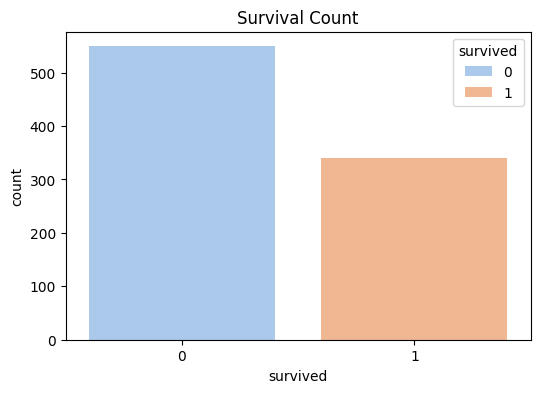

In [181]:
# Count plot - Survival count
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='survived', hue='survived', palette='pastel')
plt.title('Survival Count')
plt.show()

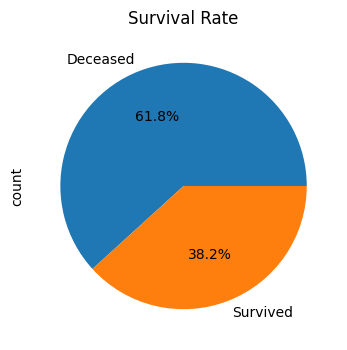

In [182]:
# Pie plot - Survival rate
plt.figure(figsize=(4, 4))
df_clean['survived'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Deceased', 'Survived'])
plt.title('Survival Rate')
plt.show()

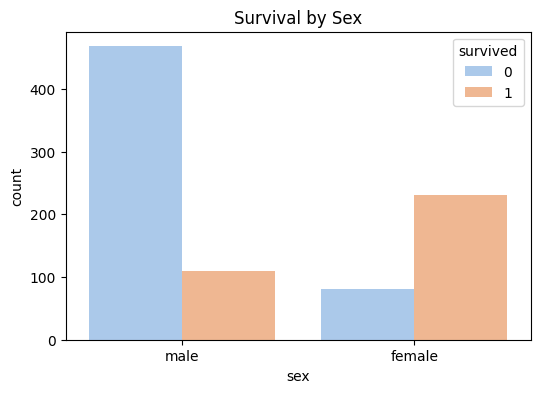

In [183]:
# Count plot - Survival by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='sex', hue='survived', palette='pastel')
plt.title('Survival by Sex')
plt.show()

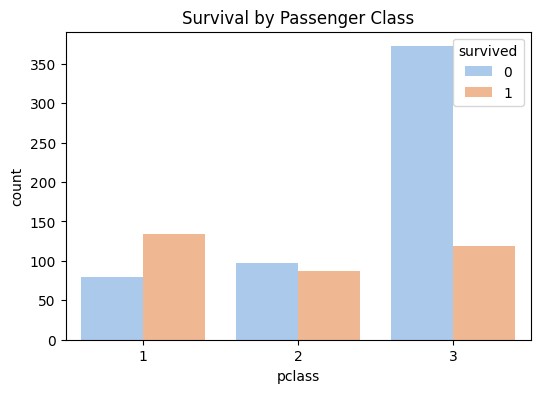

In [184]:
# Count plot - Survival by passenger class
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='pclass', hue='survived', palette='pastel')
plt.title('Survival by Passenger Class')
plt.show()

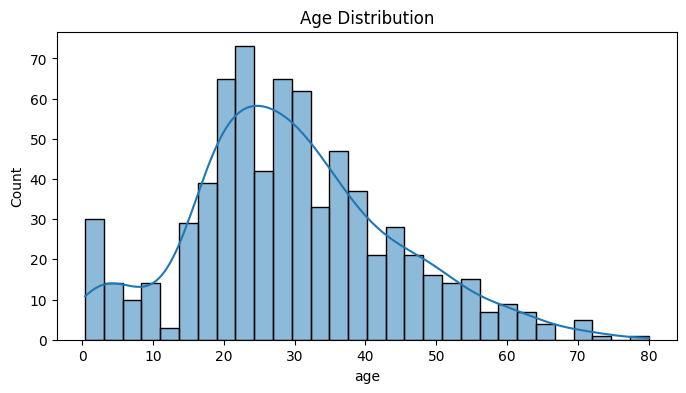

In [185]:
# Histogram - Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=df_clean, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

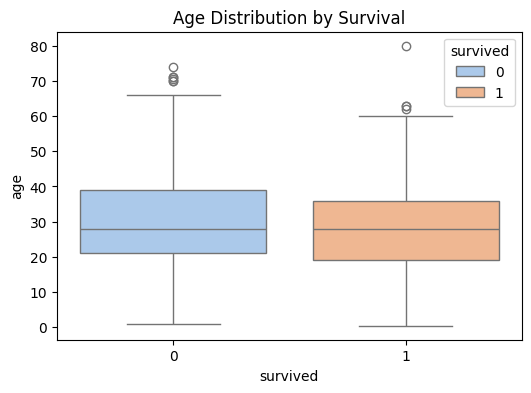

In [186]:
# Box plot - Age distribution by survival
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_clean, x='survived', y='age', hue='survived', palette='pastel')
plt.title('Age Distribution by Survival')
plt.show()

In [187]:
# Survival rate comparison by age
df_age = df.assign(Age=lambda x: x['age'].fillna(x['age'].median()))
df_age['age_group'] = pd.cut(df_age['age'],
							 bins=range(0, 81, 10), 
							 right=False,         
							 labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])
df_agegroup = (df_age.groupby('age_group', observed=True)
					 .agg(survival_rate=('survived', 'mean'),
						  survived_count=('survived', 'sum'),
						  passenger_count=('survived', 'count'))
					 .reset_index())
df_agegroup

,age_group,survival_rate,survived_count,passenger_count
0,0-9,0.612903,38,62
1,10-19,0.401961,41,102
2,20-29,0.350000,77,220
3,30-39,0.437126,73,167
4,40-49,0.382022,34,89
5,50-59,0.416667,20,48
6,60-69,0.315789,6,19
7,70-79,0.000000,0,6


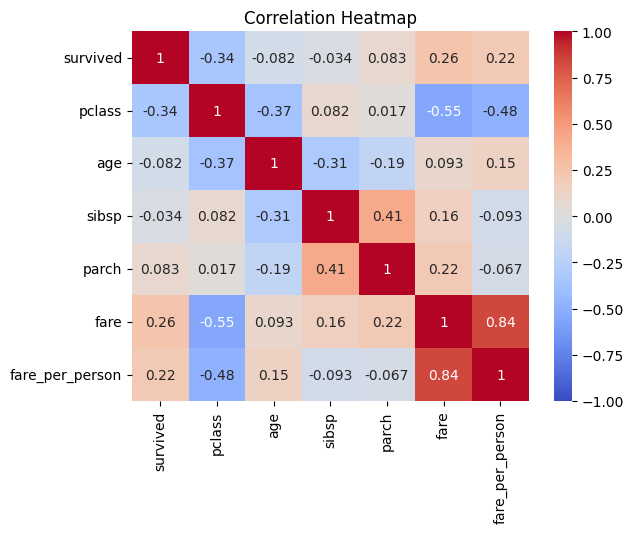

In [188]:
# Heatmap
sns.heatmap(df_clean.corr(numeric_only=True), vmin=-1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Data Preprocessing**

- Preprocessing steps safe to do before splitting
<br>

	- Remove obvious duplicates
	- Fix incorrect labels
	- Drop irrelevant columns
	- Basic data cleaning such as fixing typos or unifying units
	- Handling missing data if not based on global statistics such as dropping rows w/ missing target
	- Changing boolean type to 0 / 1
</br>

- Preprocessing steps that should happen after train-test split
<br>
	- Feature scaling / Normalisation
	- Encoding categorical variables
	- Dimensionality reduction
	- Outlier detection (if model is sensitive)
	- Feature selection based on correlation or variance
	- Creating time-based features if it involves future data
	- Data augmentation
</br>

In [189]:
# Grab column names separately for numerical and categorical columns
num_cols = df_clean.select_dtypes(include=['number']).columns
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns
print(f"Numerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

Numerical columns: Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'fare_per_person'],
      dtype='object')
Categorical columns: Index(['sex', 'embarked'], dtype='object')


In [190]:
# Check unique values of categorical columns
cat_unique = {col: df_clean[col].unique().tolist() for col in cat_cols}
print(cat_unique)

{'sex': ['male', 'female'], 'embarked': ['S', 'C', 'Q']}


In [191]:
# Data split for features and the target
X = df_clean.drop(columns=['survived'])
y = df_clean['survived']

X_clean = X.copy()
y_clean = y.copy()

In [192]:
# Dataset shape
print(f"Feature matrix shape (X): {X_clean.shape}")
print(f"Target vector shape (y): {y_clean.shape}")

Feature matrix shape (X): (889, 8)
Target vector shape (y): (889,)


In [193]:
# Data split for the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [194]:
# Handle missing values using the train mean to avoid data leakage
X_train['age'] = X_train['age'].fillna(X_train['age'].mean())
X_test['age'] = X_test['age'].fillna(X_train['age'].mean())

In [195]:
# Encode categorical values
encoder_sex = LabelEncoder()
encoder_embarked = LabelEncoder()

X_train['sex'] = encoder_sex.fit_transform(X_train['sex'])
X_test['sex'] = encoder_sex.transform(X_test['sex'])
X_train['embarked'] = encoder_embarked.fit_transform(X_train['embarked'])
X_test['embarked'] = encoder_embarked.transform(X_test['embarked'])

In [196]:
# MinMaxScaler
scaler_minmax = MinMaxScaler() # chi2 requires non-negative values
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

In [197]:
# StandardScaler
scaler_standard = StandardScaler()
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

Note that `StandardScaler()`, `OneHotEncoder()`, etc. return an array. <br>
Either manually set results as DataFrame or assign the results to the original column.

### **Feature Selection - Filter Method**

`SelectKBest` selects the top k features based on a statistical test applied to each feature individually. 
<br>
1. Pass a scoring function (`f_classif`, `chi2`, `mutual_info_classif`, `f_regression`, `mutual_info_regression`) to evaluate the relevance of each feature w,r.t. the target variable.
2. Specify k, the number of top features to keep.
3. Score all features and select the k best based on those scores.
</br>

`selector.get_support` returns a boolean mask where `True` means the feature is selected, and `False` means the features was not selected. <br>
`selector.scores_` stores the calculated score for each feature based on the scoring function used.

In [198]:
# Chi-square
selector = SelectKBest(score_func=chi2, k=5)
selector.fit(X_train_scaled_minmax, y_train)

# Get selected features
selected_features = X_train.columns[selector.get_support()]
print("Top Features Selected by Chi-Square:", selected_features.tolist())

# Get feature scores
chi_scores = selector.scores_
feature_scores = pd.Series(chi_scores, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

Top Features Selected by Chi-Square: ['pclass', 'sex', 'fare', 'embarked', 'fare_per_person']
sex                67.835709
pclass             20.473888
fare                6.353346
embarked            4.394316
fare_per_person     3.946829
parch               0.970274
sibsp               0.786036
age                 0.196058
dtype: float64


In [199]:
# Mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=5)
selector.fit(X_train_scaled_standard, y_train)

# Get top selected features
selected_features = X_train.columns[selector.get_support()]
print("Top Features Selected by Mutual Information:", selected_features.tolist())

# Get feature scores
feature_scores = pd.Series(selector.scores_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

Top Features Selected by Mutual Information: ['pclass', 'sex', 'sibsp', 'fare', 'fare_per_person']
sex                0.130953
fare               0.116310
fare_per_person    0.113960
pclass             0.080972
sibsp              0.007698
age                0.005443
embarked           0.002558
parch              0.000000
dtype: float64


### **Feature Selection - Wrapper Method**

- Recursive Feature Elimination (`RFE`): Select features by recursively removing the least important features based on the model's weights (like coefficients or features importance). <br>

	1. A model is trained on all features.
	2. Model ranks features by importance (model coefficients or feature importances).
	3. The least important feature is eliminated.
	4. The process repeats until the desired number of features `n_features_to_select` is reached. 
	</br>
	- `rfe.support_`: Boolean mask indicating which feature is selected.
	- `rfe.ranking`: Rank all features where higher numbers mean less important (eliminated earlier).
	<br>
	
- `SequentialFeatureSelector` (SFS): Greedy search algorithm that adds or removes features one by one based on model performance (cross-validated score).
	- `forward=True`: Start w/ no features and add the best one at each step.
	- `forward=False`: Start w/ all features and remove the least useful one at each step.

In [200]:
# Initialise model
estimator = LogisticRegression(max_iter=200)

# Apply RFE
rfe = RFE(estimator=estimator, n_features_to_select=5)
rfe.fit(X_train, y_train)

print("Selected Features:", X_train.columns[rfe.support_].tolist())
feature_ranks = dict(zip(X_train.columns, [int(r) for r in rfe.ranking_]))
print(f"Feature Ranks: {feature_ranks}")

Selected Features: ['pclass', 'sex', 'sibsp', 'parch', 'embarked']
Feature Ranks: {'pclass': 1, 'sex': 1, 'age': 2, 'sibsp': 1, 'parch': 1, 'fare': 4, 'embarked': 1, 'fare_per_person': 3}


In [201]:
# Initialise model
estimator = LogisticRegression(max_iter=200)

# Apply SFS
sfs = SequentialFeatureSelector(estimator=estimator, n_features_to_select=5, direction='forward', scoring='accuracy', cv=5)
sfs.fit(X_train, y_train)

print("Selected Features:", X_train.columns[sfs.support_].tolist())

Selected Features: ['pclass', 'sex', 'age', 'sibsp', 'parch']


### **Feature Selection - Embedded Method**

`elasticnet` combines both L1 (feature selection) and L2 (regularisation). <br>
`l1_ratio=0.5` means 50% L1, 50% L2 influence.<br>

`model.feature_importances` is an attribute available only in tree-based models that compute feture importance scores based on how valuable each feature was in constructing the model. <br>

`VarianceThreshold` removes features w/ low variance.

In [202]:
# Elastic net logistic regression
elastic_net = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=500)
elastic_net.fit(X_train_scaled_standard, y_train)

# Get non-zero coefficients
coef = pd.Series(elastic_net.coef_[0], index=X_train.columns)
selected_features = coef[coef != 0].index.tolist()

print("Features Selected by Elastic Net:", selected_features)
print("Elastic Net Coefficients:\n", coef.abs().sort_values(ascending=False))

Features Selected by Elastic Net: ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'fare_per_person']
Elastic Net Coefficients:
 sex                1.305606
pclass             0.948616
age                0.572075
sibsp              0.478110
fare               0.227821
embarked           0.221547
fare_per_person    0.201344
parch              0.092630
dtype: float64


In [203]:
# Initialise model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Random Forest Feature Importance:\n", feature_importance)

Random Forest Feature Importance:
 sex                0.252430
age                0.222003
fare               0.181198
fare_per_person    0.169680
pclass             0.067283
sibsp              0.043011
embarked           0.033689
parch              0.030705
dtype: float64


In [204]:
# Variance threshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(X_train)

# Get top selected features
selected_features = X_train.columns[selector.get_support()]
print("Selected after Variance Threshold:", selected_features.tolist())

Selected after Variance Threshold: ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'fare_per_person']


### **Feature Extraction**

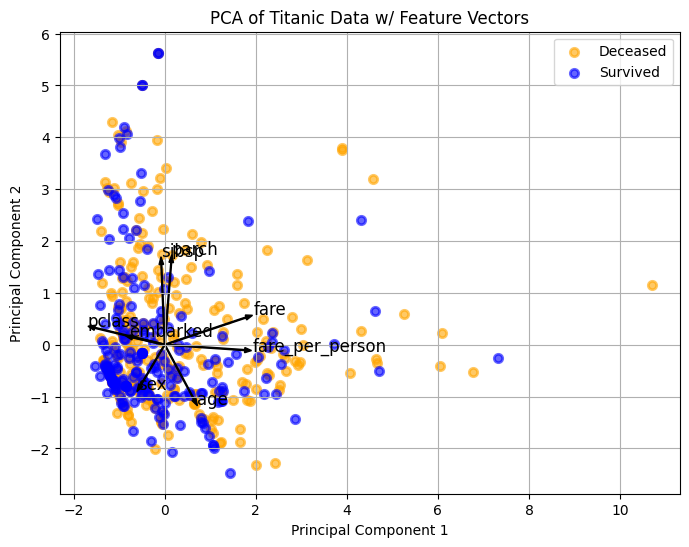

In [205]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled_standard)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y_train

# Plot PCA results
plt.figure(figsize=(8, 6))
colors = ['orange', 'blue']
target_names = ['Deceased', 'Survived']
for color, i, target_name in zip(colors, [0, 1], target_names): 
	plt.scatter(df_pca.loc[df_pca['target'] == i, 'PC1'], df_pca.loc[df_pca['target'] == i, 'PC2'], color=color, lw=2, label=target_name, alpha=0.6) 

# Plot PC
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) # Extract feature contributions
feature_names = X.columns.tolist() # Feature column names
scaling_factor = 2 
for i, (x, y) in enumerate(loadings): # Plot vectors (arrows) for original features 
	plt.arrow(0, 0, scaling_factor * x, scaling_factor * y, color='black', width=0.02, head_width=0.1) # Scaling arrows
	plt.text((scaling_factor + 0.2) * x, (scaling_factor + 0.2) *y, feature_names[i], color='black', fontsize=12)

plt.title('PCA of Titanic Data w/ Feature Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.grid()
plt.show()

### **Model Training**

`hasattr` check whether the model supports the attribute. <br>

`model.predict_proba` returns the probability estimates (n_samples, p_classes) and usually takes [:, 1] for the positive class probabilities. <br>

`model.decision_function` returns the raw scores or distances to the decision boundary. <br>

`model.predict` applies the model's default threshold, so for the threshold tuning, skip `predict()` and manually apply chosen threshold on the probabilities or decision scores.

In [206]:
# Models
models = {'Logistic Regression': LogisticRegression(max_iter=500),
		  'Naive Bayes': GaussianNB(),
		  'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True),
		  'KNN': KNeighborsClassifier(n_neighbors=5),
		  'Decision Tree': DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=4, min_samples_leaf=2, random_state=42),
		  'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
		  'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
		  'XGBoost': xgb.XGBClassifier(eval_metric='logloss', random_state=42),
		  'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)}


In [207]:
# Cross-Validation Scores
print("Cross-Validation Scores (5-fold):")
for name, model in models.items():
	scores = cross_val_score(model, X_train_scaled_standard, y_train, cv=5, scoring='accuracy')
	print(f"{name}: Mean Accuracy = {scores.mean():.4f} (+/- {scores.std():.4f})")

Cross-Validation Scores (5-fold):
Logistic Regression: Mean Accuracy = 0.7960 (+/- 0.0338)
Naive Bayes: Mean Accuracy = 0.7890 (+/- 0.0186)
SVM (RBF Kernel): Mean Accuracy = 0.8129 (+/- 0.0189)
KNN: Mean Accuracy = 0.8129 (+/- 0.0185)
Decision Tree: Mean Accuracy = 0.8369 (+/- 0.0078)
Random Forest: Mean Accuracy = 0.8144 (+/- 0.0270)
Gradient Boosting: Mean Accuracy = 0.8397 (+/- 0.0164)
XGBoost: Mean Accuracy = 0.8046 (+/- 0.0213)
AdaBoost: Mean Accuracy = 0.8031 (+/- 0.0196)


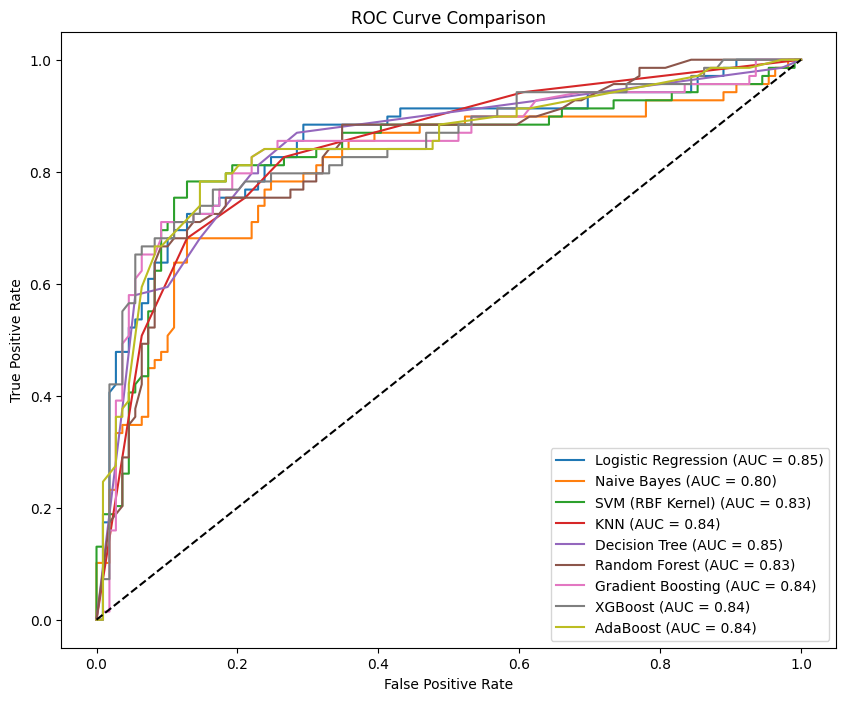

In [208]:
# ROC Curve Plot
plt.figure(figsize=(10, 8))
for name, model in models.items():
	model.fit(X_train_scaled_standard, y_train)
	if hasattr(model, "predict_proba"):
		y_proba = model.predict_proba(X_test_scaled_standard)[:, 1]
	else:
		y_proba = model.decision_function(X_test_scaled_standard)
	fpr, tpr, threshold = roc_curve(y_test, y_proba)
	roc_auc = auc(fpr, tpr)
	plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Confusion Matrix for Logistic Regression (After Threshold Tuning):
[[77 32]
 [ 8 61]]
Threshold for Logistic Regression: 0.3034
Accuracy: 0.7753

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.79       109
           1       0.66      0.88      0.75        69

    accuracy                           0.78       178
   macro avg       0.78      0.80      0.77       178
weighted avg       0.81      0.78      0.78       178



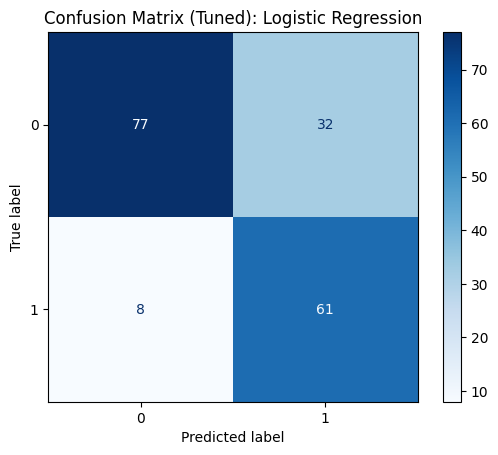


Confusion Matrix for Naive Bayes (After Threshold Tuning):
[[95 14]
 [22 47]]
Threshold for Naive Bayes: 0.5662
Accuracy: 0.7978

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       109
           1       0.77      0.68      0.72        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



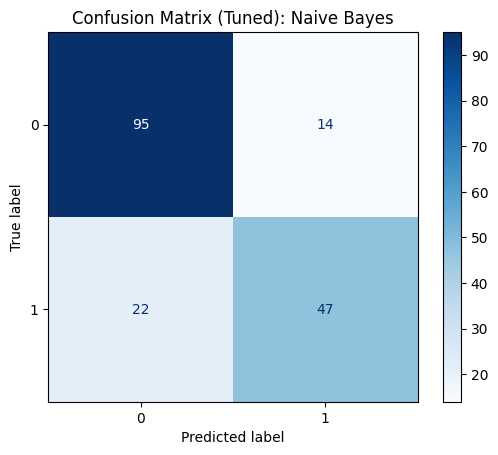


Confusion Matrix for SVM (RBF Kernel) (After Threshold Tuning):
[[95 14]
 [15 54]]
Threshold for SVM (RBF Kernel): 0.5714
Accuracy: 0.8371

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       109
           1       0.79      0.78      0.79        69

    accuracy                           0.84       178
   macro avg       0.83      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



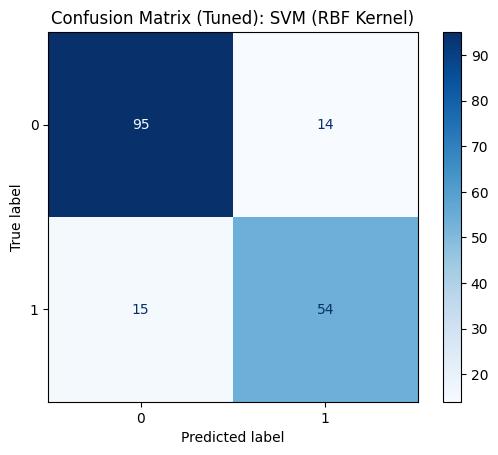


Confusion Matrix for KNN (After Threshold Tuning):
[[80 29]
 [12 57]]
Threshold for KNN: 0.4000
Accuracy: 0.7697

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.80       109
           1       0.66      0.83      0.74        69

    accuracy                           0.77       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.77      0.77       178



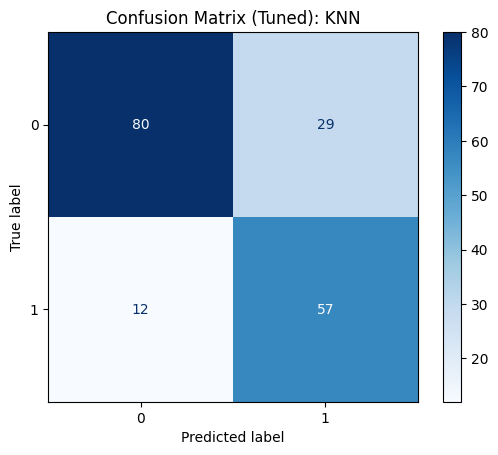


Confusion Matrix for Decision Tree (After Threshold Tuning):
[[78 31]
 [ 9 60]]
Threshold for Decision Tree: 0.2200
Accuracy: 0.7753

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80       109
           1       0.66      0.87      0.75        69

    accuracy                           0.78       178
   macro avg       0.78      0.79      0.77       178
weighted avg       0.80      0.78      0.78       178



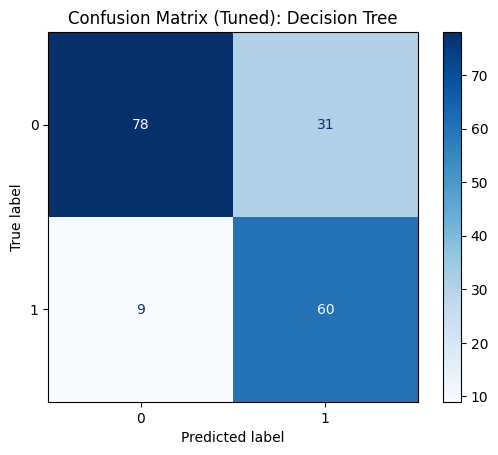


Confusion Matrix for Random Forest (After Threshold Tuning):
[[89 20]
 [17 52]]
Threshold for Random Forest: 0.6200
Accuracy: 0.7921

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       109
           1       0.72      0.75      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.79      0.79      0.79       178



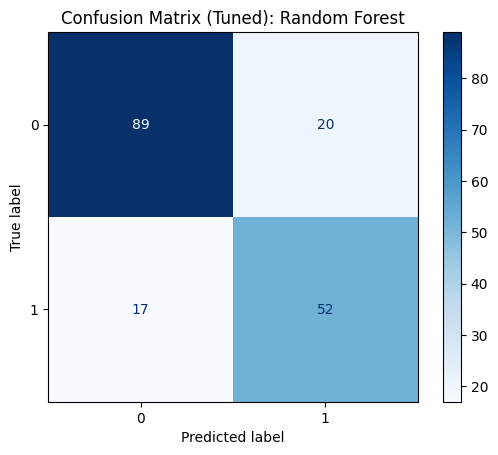


Confusion Matrix for Gradient Boosting (After Threshold Tuning):
[[99 10]
 [20 49]]
Threshold for Gradient Boosting: 0.7012
Accuracy: 0.8315

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       109
           1       0.83      0.71      0.77        69

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



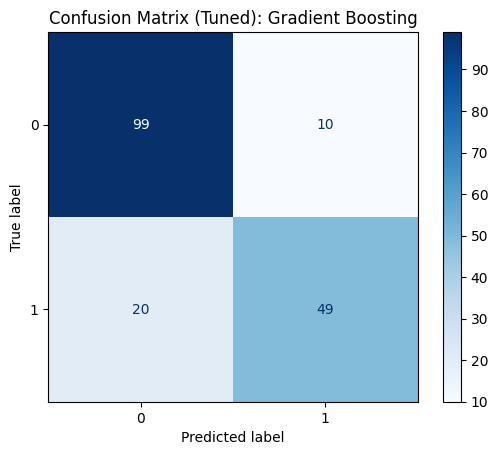


Confusion Matrix for XGBoost (After Threshold Tuning):
[[91 18]
 [16 53]]
Threshold for XGBoost: 0.6414
Accuracy: 0.8090

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       109
           1       0.75      0.77      0.76        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



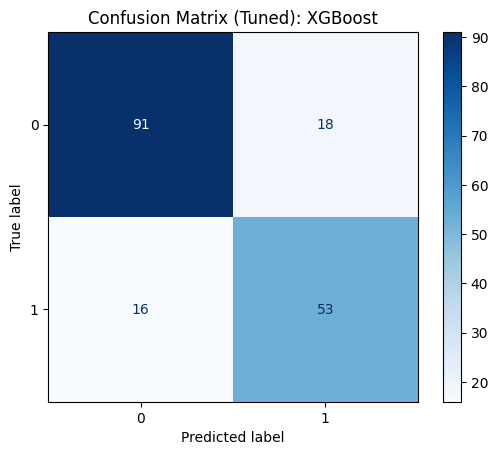


Confusion Matrix for AdaBoost (After Threshold Tuning):
[[93 16]
 [15 54]]
Threshold for AdaBoost: 0.5236
Accuracy: 0.8258

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       109
           1       0.77      0.78      0.78        69

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



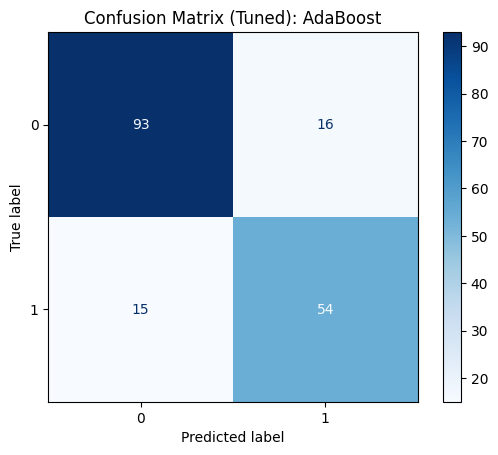

In [221]:
for name, model in models.items():
	# Fit and get probability or decision scores
	model.fit(X_train_scaled_standard, y_train)
	if hasattr(model, "predict_proba"):
		y_scores = model.predict_proba(X_test_scaled_standard)[:, 1]
	else:
		y_scores = model.decision_function(X_test_scaled_standard)
	
	# Find the best threshold based on F1 Score
	fpr, tpr, thresholds = roc_curve(y_test, y_scores)
	f1_scores = [f1_score(y_test, (y_scores >= thresh).astype(int)) for thresh in thresholds]
	best_threshold = thresholds[np.argmax(f1_scores)]
	
	# Predict using best threshold
	y_pred_threshold = (y_scores >= best_threshold).astype(int)
	
	# Confusion Matrix and Metrics
	cm = confusion_matrix(y_test, y_pred_threshold)
	TN, FP, FN, TP = cm.ravel()
	accuracy = accuracy_score(y_test, y_pred_threshold) # (TP + TN) / (TP + TN + FP + FN)
	precision = precision_score(y_test, y_pred_threshold, zero_division=0) # TP / (TP + FP)
	recall = recall_score(y_test, y_pred_threshold, zero_division=0) # TP / (TP + FN)
	specificity = TN / (TN + FP)
	f1 = f1_score(y_test, y_pred_threshold)
	
	# Display Results
	print(f"\nConfusion Matrix for {name} (After Threshold Tuning):")
	print(cm)
	print(f"Threshold for {name}: {best_threshold:.4f}")
	print(f"Accuracy: {accuracy:.4f}")
	print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold, zero_division=0))
	
	# Plot Confusion Matrix
	disp = ConfusionMatrixDisplay(confusion_matrix=cm)
	disp.plot(cmap='Blues')
	plt.title(f'Confusion Matrix (Tuned): {name}')
	plt.show()

### **Hyperparameter Tuning**

In [210]:
# Random forest model
model_rf= RandomForestClassifier()

# Hyperparameter for grid search and random search
hyperparams = {'n_estimators': [10, 50, 100],   # Number of trees
			   'max_depth': [None, 10, 20],     # Maximum depth of trees
			   'min_samples_split': [2, 5, 10], # Minimum number of samples to split an internal node
			   'min_samples_leaf': [1, 2, 4],   # Minimum number of samples to be in a leaf node
			   'bootstrap': [True, False]}      # Bootstrapping

In [211]:
# Grid search (Exhaustive search)
grid_search = GridSearchCV(estimator=model_rf, 	
						   param_grid=hyperparams, 	
						   cv=5)
grid_search.fit(X_train_scaled_standard, y_train)

# Best hyperparameter
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled_standard, y_train)  

Best hyperparameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.8508913621589678


RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       min_samples_split=5)

In [212]:
# Random search (Random trials)
random_search = RandomizedSearchCV(estimator=model_rf, 
								   param_distributions=hyperparams,
								   n_iter=10, 	
								   cv=5, 
								   random_state=42)
random_search.fit(X_train_scaled_standard, y_train)

# Best hyperparameter
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)
print("Best cross-validation score:", random_search.best_score_)

# Best model
best_model = random_search.best_estimator_
best_model.fit(X_train_scaled_standard, y_train)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}
Best cross-validation score: 0.8424702058504876


RandomForestClassifier(bootstrap=False, min_samples_leaf=4)

### **Ensemble**


In [213]:
# Bagging
bagging_clf = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Prediction
y_pred = bagging_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.7247


In [214]:
# Boosting
boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting_clf.fit(X_train, y_train)

# Prediction
y_pred = boosting_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.7921


In [215]:
# Stacking
# Base learners
estimators = [('knn', KNeighborsClassifier(n_neighbors=5)),
			  ('dt', DecisionTreeClassifier(max_depth=4)),
			  ('svc', SVC(probability=True))]

# Final estimator
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stacking_clf.fit(X_train, y_train)

# Prediction
y_pred = stacking_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.7809


### **Neural Network**

**Root cause of overfitting / accuracy drop**
1. Model complexity is too high for the dataset size
2. Learning rate / optimizer
3. No regularisation
4. No early stopping
5. Class imbalance
6. Feature scaling / input issues

**Ways to fix**
1. Add dropout layer
2. Switch optimizer
3. Add regularisation
4. Add early stopping
5. Check class imbalance
6. Normalise / Standardise input features

In [216]:
# Device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [217]:
# Convert DataFrame to tensor
X_train_tensor = torch.tensor(X_train_scaled_standard, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled_standard, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).squeeze().float().to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).squeeze().float().to(device)

print(X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape)

torch.Size([711, 8]) torch.Size([178, 8]) torch.Size([711]) torch.Size([178])


In [218]:
# Build a simple neural network model
class simple_nn(nn.Module):
	def __init__(self, in_features, hidden_features, out_features):
		'''
        Initialise the simple neural network model.

        Parameters:
        - in_features: Number of input features.
        - hidden_features: Number of neurons in hidden layers.
        - out_features: Number of output neurons.
        '''
		super().__init__()
		self.layer_stack = nn.Sequential(nn.Linear(in_features=in_features, out_features=hidden_features),
										 nn.ReLU(),
										 nn.Dropout(0.2),
										 nn.Linear(in_features=hidden_features, out_features=out_features))
		
	def forward(self, x):
		'''
        Define the forward pass through the network.
        '''
		return self.layer_stack(x)
	
# Instantiate the model
model = simple_nn(in_features=X_train_tensor.shape[1], hidden_features=8, out_features=1).to(device)

In [219]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()
accuracy = Accuracy(task="binary").to(device) 
optimizer = torch.optim.Adam(params=model.parameters(),
							 lr=0.01,
							 weight_decay=1e-4)

In [220]:
epochs = 100
for epoch in range(epochs):
	# Training loop
	model.train()
	
	# 1. Forward pass
	y_logit_train = model(X_train_tensor).squeeze()
	y_prob_train = torch.sigmoid(y_logit_train)
	y_pred_train = torch.round(y_prob_train)
	
	# 2. Compute the loss
	loss_train = criterion(y_logit_train, y_train_tensor)
	acc_train = accuracy(y_train_tensor, y_pred_train)
	
	# 3. Reset the gradients
	optimizer.zero_grad()
	
	# 4. Backward propagation
	loss_train.backward()
	
	# 5. Run gradient descents
	optimizer.step()
	
	# Testing loop
	model.eval()
	with torch.inference_mode():
		# 1. Forward pass
		y_logit_test = model(X_test_tensor).squeeze()
		y_prob_test = torch.sigmoid(y_logit_test)
		y_pred_test = torch.round(y_prob_test)
		
		# 2. Compute the loss
		loss_test = criterion(y_logit_test, y_test_tensor)
		acc_test = accuracy(y_test_tensor, y_pred_test)
		
	if (epoch+1) % 10 == 0:
		print(f"Epoch [{epoch+1}/{epochs}] | Training loss: {loss_train.item():.4f} | Training accuracy: {acc_train.item():.4f} | Testing loss: {loss_test.item():.4f} | Testing accuracy: {acc_test.item():.4f}")

Epoch [10/100] | Training loss: 0.6156 | Training accuracy: 0.6807 | Testing loss: 0.6081 | Testing accuracy: 0.7135
Epoch [20/100] | Training loss: 0.5578 | Training accuracy: 0.7454 | Testing loss: 0.5506 | Testing accuracy: 0.7528
Epoch [30/100] | Training loss: 0.4980 | Training accuracy: 0.7750 | Testing loss: 0.4936 | Testing accuracy: 0.7865
Epoch [40/100] | Training loss: 0.4531 | Training accuracy: 0.7904 | Testing loss: 0.4735 | Testing accuracy: 0.8090
Epoch [50/100] | Training loss: 0.4356 | Training accuracy: 0.7918 | Testing loss: 0.4817 | Testing accuracy: 0.7921
Epoch [60/100] | Training loss: 0.4524 | Training accuracy: 0.8059 | Testing loss: 0.4789 | Testing accuracy: 0.7921
Epoch [70/100] | Training loss: 0.4331 | Training accuracy: 0.7975 | Testing loss: 0.4701 | Testing accuracy: 0.8034
Epoch [80/100] | Training loss: 0.4300 | Training accuracy: 0.8059 | Testing loss: 0.4674 | Testing accuracy: 0.7978
Epoch [90/100] | Training loss: 0.4203 | Training accuracy: 0.81